#  Facial Recognition App using Siamese Neural Networks for One-shot Image Recognition

## 1.1 Vertual environment setup
it can be done in two ways 

#### 1. with the help of venv -

    step1. open new command prompt and go to your project folder location.
        for example my proj folder name <TFODCourse> is in F drive inside the folder <objectdetection>
    step2. Create a new virtual environment by writing this command on the comm prompt
               
            python -m venv <env_name>
    
    step3. Now your env is created now its time to activate your virtual environment by writing followeing commands 

           .\<env_name>\Scripts\activate            #for windows
           
           after this command you will be inside your vertual env it will look like below
           example- (env_name) F:\object detection\TFODCourse>
           
    step4. Install dependencies and add virtual environment to the Python Kernel
           
           python -m pip install --upgrade pip
           pip install ipykernel
           python -m ipykernel install --user --name=<env_name>
           
    step5. now activate jupyter notebook like below
           
           (env_name) F:\object detection\TFODCourse>jupyter notebook


#### 2. with the help of Anaconda - 

        step1. open new command prompt and go to your project folder location.

        step2. conda create -p <env_name> python 

        step3. conda activate <env_name>/
        
               after this command you will be inside your vertual env it will look like below
               example- (env_name) F:\object detection\TFODCourse>
        
        step4. now activate jupyter notebook 

## 1.2 Install & Import Dependencies

In [ ]:
!pip install tensorflow 
!pip install opencv-python 
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 394.3 MB 16 kB/s 
     |████████████████████████████████| 14.8 MB 49.5 MB/s 
     |████████████████████████████████| 132 kB 68.5 MB/s 
     |████████████████████████████████| 2.9 MB 46.7 MB/s 
     |████████████████████████████████| 462 kB 69.0 MB/s 
     |████████████████████████████████| 3.8 MB 56.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68726 sha256=080da22f83a7f0092cd7f08a45245ca63a48b065b6a80d513ce40b85842e40fa
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Atte

## For Google Colab 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
root= '/content/drive/MyDrive/face_detection'
import os
os.chdir(root)

In [2]:
pwd

'/content/drive/MyDrive/face_detection'

## import libraries

In [1]:
# Import standard dependencies
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.1


## 1.3 Create Folder Structures for storing Dataset

In [3]:
# Set paths of directories
TRUE_PATH = os.path.join('images', 'true_images')
FALSE_PATH = os.path.join('images', 'false_images')
INPUT_PATH = os.path.join('images', 'input_images')

In [ ]:
# Make the directories
os.makedirs(TRUE_PATH)
os.makedirs(FALSE_PATH)
os.makedirs(INPUT_PATH)

## 1.4 Collect Dataset (True False and Input Images)

#### 1.4.1 False_Images-
1. we will collect the false images of random unknown faces from the website [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/index.html) and downlode all images as gzipped tar file from [here](http://vis-www.cs.umass.edu/lfw/lfw.tgz)
2. Uncompress gzipped tar file
3. transfer images from lfw directory to images/false_images directory

In [ ]:
# ungzipped Tar file in the Wild Dataset
!tar -xf lfw.tgz

In [ ]:
#total number of images folders - 
len(os.listdir('lfw'))

5749

In [ ]:
#transfer images from lfw directory to images/false_images directory
path = 'lfw'
for folder in os.listdir(path):
    for img_file in os.listdir(os.path.join(path,folder)):

        CURRENT_PATH= os.path.join(path, folder, img_file)
        NEW_PATH = os.path.join(FALSE_PATH, img_file)
        os.replace(CURRENT_PATH, NEW_PATH)
        

In [ ]:
#total number of images - 
len(os.listdir(FALSE_PATH))

13233

#### 1.4.2 Collect True and Input Images-

In [ ]:
# library to generate unique image names
import uuid

In [ ]:
#os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
os.path.join(TRUE_PATH, f"{uuid.uuid1()}.jpg")

'images\\true_images\\34801f76-3335-11ed-a321-767b4db31ca2.jpg'

In [ ]:
cap =  cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    frame = cv2.resize(frame,(250,250))
    
    if cv2.waitKey(1) & 0xFF== ord('i'):
        print("ready for click! i")
        path = os.path.join(INPUT_PATH,f"{uuid.uuid1()}.jpg")
        cv2.imwrite(path,frame)
        print('clicked i')

    if cv2.waitKey(1) & 0xFF== ord('t'):
        print("ready for click t!")
        path = os.path.join(TRUE_PATH,f"{uuid.uuid1()}.jpg")
        cv2.imwrite(path,frame)
        print('clicked t')
        
        # Show image back to screen
    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click! i
clicked i
ready for click t!
clicked t
ready for click t!
clicked t
ready for click t!
clicked t
ready for click t!
clicked t


In [ ]:
true_img = os.path.join(TRUE_PATH,"1dec09d8-3337-11ed-8605-767b4db31ca2.jpg")
img = cv2.imread(true_img)
img.shape

(250, 250, 3)

## 1.5 data agumentation
1. a technique to increase the diversity of your training set by applying random (but realistic) transformations.
2. The `tf.image` module contains various functions for image processing and decoding-encoding Ops.
    1. Adjust the brightness of images by a random factor deterministically.
    2. Adjust the contrast of images by a random factor deterministically.
    3. Randomly flip an image horizontally (left to right) deterministically.
    4. Randomly changes jpeg encoding quality for inducing jpeg noise
    5. Adjust the saturation of RGB images by a random factor deterministically.
    
    seed-Guarantees the same results given the same seed independent of how many times the function is called


In [ ]:
def data_aug(img):
  data = []
  for i in range(9):
    img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
    img = tf.image.stateless_random_contrast(img, lower=0.6,upper= 1, seed=(1,3))
    img = tf.image.stateless_random_flip_left_right(img, seed = (np.random.randint(100),np.random.randint(100)))
    img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90,max_jpeg_quality=100, seed = (np.random.randint(100),np.random.randint(100)))
    img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1,seed = (np.random.randint(100),np.random.randint(100)))

    data.append(img)

  return data
                                                                                                                                              

In [ ]:
for file_name in os.listdir(os.path.join(INPUT_PATH)):
    img_path = os.path.join(INPUT_PATH, file_name)
    print(img_path)

images\input_images\0605c302-3337-11ed-ae4c-767b4db31ca2.jpg
images\input_images\0975390a-3337-11ed-9e89-767b4db31ca2.jpg
images\input_images\099741b2-3337-11ed-9707-767b4db31ca2.jpg
images\input_images\0a522854-3337-11ed-bfd0-767b4db31ca2.jpg
images\input_images\0ad7f956-3337-11ed-b142-767b4db31ca2.jpg
images\input_images\0b56eca4-3337-11ed-b5a0-767b4db31ca2.jpg
images\input_images\134faa94-3337-11ed-a89e-767b4db31ca2.jpg
images\input_images\13e86602-3337-11ed-be29-767b4db31ca2.jpg
images\input_images\1447c2b0-3337-11ed-bd22-767b4db31ca2.jpg
images\input_images\15091434-3337-11ed-92fe-767b4db31ca2.jpg
images\input_images\1575de30-3337-11ed-9539-767b4db31ca2.jpg
images\input_images\15d4c5bb-3337-11ed-b84d-767b4db31ca2.jpg
images\input_images\90c56ade-3336-11ed-a0f0-767b4db31ca2.jpg
images\input_images\a0a92f0b-3336-11ed-9c2b-767b4db31ca2.jpg
images\input_images\a0d28623-3336-11ed-b4f8-767b4db31ca2.jpg
images\input_images\a258846a-3336-11ed-bb8e-767b4db31ca2.jpg
images\input_images\a3cf

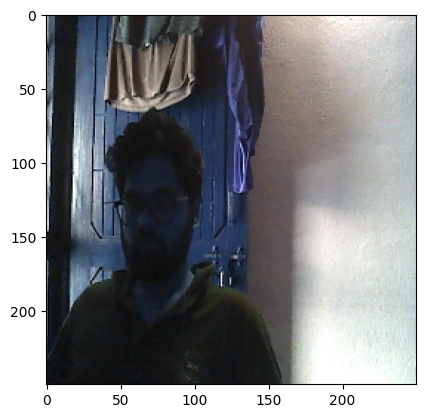

In [ ]:
img_path = os.path.join('images','input_images','0605c302-3337-11ed-ae4c-767b4db31ca2.jpg')
img = cv2.imread(img_path)
plt.imshow(img)

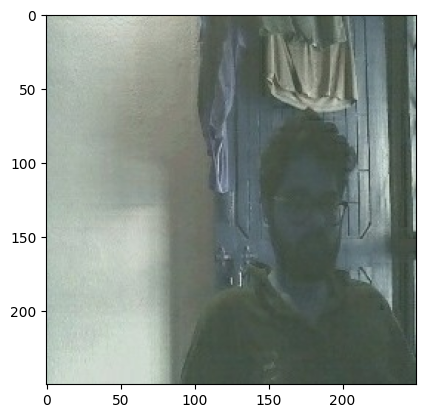

In [ ]:
aug_imgs = data_aug(img)
aug_imgs
for image in aug_imgs:
    plt.imshow(image) 

In [ ]:
#input images augumentation
for file_name in os.listdir(os.path.join(INPUT_PATH)):
    img_path = os.path.join(INPUT_PATH, file_name)
    img = cv2.imread(img_path)
    aug_imgs = data_aug(img)

for image in aug_imgs:
    cv2.imwrite(os.path.join(INPUT_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())
    

In [ ]:
#true images augumentation
for file_name in os.listdir(os.path.join(TRUE_PATH)):
    img_path = os.path.join(TRUE_PATH, file_name)
    img = cv2.imread(img_path)
    aug_imgs = data_aug(img)

for image in aug_imgs:
    cv2.imwrite(os.path.join(TRUE_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

## 3.1 Get Image Directories with Data API of tensorflow

In [56]:
input_fileset = tf.data.Dataset.list_files(INPUT_PATH+'/*.jpg').take(20)
true_fileset= tf.data.Dataset.list_files(TRUE_PATH+'/*.jpg').take(20)
false_fileset = tf.data.Dataset.list_files(FALSE_PATH+'/*.jpg').take(20)

In [5]:
input_fileset = tf.data.Dataset.list_files(INPUT_PATH+'/*.jpg').take(2000)
true_fileset= tf.data.Dataset.list_files(TRUE_PATH+'/*.jpg').take(2000)
false_fileset = tf.data.Dataset.list_files(FALSE_PATH+'/*.jpg').take(2000)

In [6]:
input_fileset,true_fileset,false_fileset

(<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>)

In [7]:
dir_test = input_fileset.as_numpy_iterator()

In [8]:
print(dir_test.next())

b'images/input_images/51f21a12-2544-11ed-9d18-0242ac1c0002.jpg'


## 3.2 Accessing Image files and Preprocessing - Scale and Resize

In [5]:
def access_imgfiles_and_preprocess(file_path):
    
    # Read in image from file path( retrun the content of file as tensor)
    byte_img = tf.io.read_file(file_path)
    
    # Load in the image (Decode a JPEG-encoded image to a uint8 tensor.)
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 105x105x3
    img = tf.image.resize(img, (105,105))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

## 3.3 Create Labelled Dataset

In [21]:
# (input_images, true_images) => 1,1,1,1,1
# (input_images, false_images) => 0,0,0,0,0

In [57]:
trueset = tf.data.Dataset.zip((input_fileset, true_fileset, tf.data.Dataset.from_tensor_slices(tf.ones(len(input_fileset)))))
falseset = tf.data.Dataset.zip((input_fileset, false_fileset, tf.data.Dataset.from_tensor_slices(tf.zeros(len(input_fileset)))))
dataset = trueset.concatenate(falseset)

## 3.4 Build Train and Test Partition after Preprocessing

In [23]:
def preprocess_dataset(input_file, validation_file, label):
    return(access_imgfiles_and_preprocess(input_file), access_imgfiles_and_preprocess(validation_file), label)

In [58]:
# Build dataloader pipeline
dataset = dataset.map(preprocess_dataset)
dataset = dataset.cache()
dataset = dataset.shuffle(buffer_size=8000)

In [59]:
# Training partition
train_data = dataset.take(round(len(dataset)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [60]:
# Testing partition
test_data = dataset.skip(round(len(dataset)*.7))
test_data = test_data.take(round(len(dataset)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

## 4. Model Construction and Training 

### Using Subclass API for Modeling

In [16]:
class CustomModel(Model):
    pass

### Customizing Training Steps 

In [11]:
class CustomModel(Model):
    def train_step(self, batch):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        #x, y = data
        x = batch[:2]
        # Get label
        y = batch[2]

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}

## 4.1 Build Embedding Layer

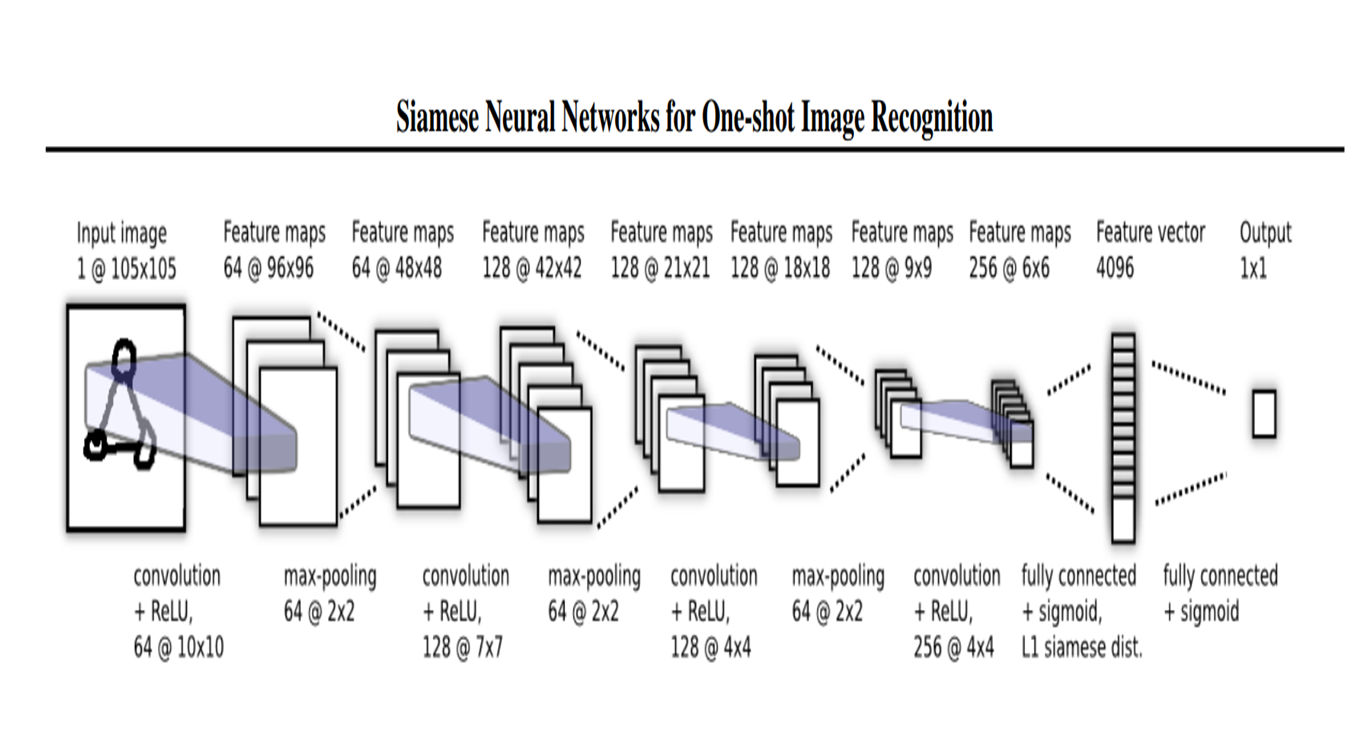

In [10]:
def build_initial_model_layers(): 
    inp = Input(shape=(105,105,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return CustomModel(inputs=[inp], outputs=[d1], name='embedding')

In [11]:
embedding = build_initial_model_layers()

## 4.2 Build Distance Layer

In [12]:
# Siamese L1 Distance class
class DistanceLayer(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

## 4.3 Make Siamese Model

In [13]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(105,105,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(105,105,3))
    
    embedding = build_initial_model_layers()
    # Combine siamese distance components
    siamese_layer = DistanceLayer()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return CustomModel(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [14]:
model = make_siamese_model()

In [15]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (CustomModel)        (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 5. Training

## 5.1 Setup Loss and Optimizer

In [16]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [17]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [26]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('frmoidel.weights.best.hdf5')

## complie the model

In [27]:
model.compile(optimizer=opt, loss=binary_cross_loss)

## strat trainig loop

In [28]:
model.fit(train_data, epochs=100, checkpoint = [checkpointer])

Epoch 1/100
175/175 [==============================] - 709s 238ms/step - loss: 0.2602
Epoch 2/100
175/175 [==============================] - 40s 229ms/step - loss: 0.0720
Epoch 3/100
175/175 [==============================] - 39s 223ms/step - loss: 0.0587
Epoch 4/100
175/175 [==============================] - 38s 219ms/step - loss: 0.0406
Epoch 5/100
175/175 [==============================] - 39s 221ms/step - loss: 0.0370
Epoch 6/100
175/175 [==============================] - 38s 216ms/step - loss: 0.0480
Epoch 7/100
175/175 [==============================] - 37s 209ms/step - loss: 0.0585
Epoch 8/100
175/175 [==============================] - 37s 209ms/step - loss: 0.0099
Epoch 9/100
175/175 [==============================] - 37s 209ms/step - loss: 0.0225
Epoch 10/100
175/175 [==============================] - 36s 205ms/step - loss: 0.0165
Epoch 11/100
175/175 [==============================] - 36s 203ms/step - loss: 0.0422
Epoch 12/100
175/175 [==============================] - 35s 20

# 6. Evaluate Model

## 6.1 Import Metrics

In [33]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [52]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [53]:
# Make predictions
y_hat = model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 8s 8s/step


array([[1.7635357e-06],
       [6.5715402e-01],
       [2.1362764e-06],
       [3.6330014e-06],
       [9.0669324e-05],
       [7.5481933e-01],
       [9.9999976e-01],
       [9.9033129e-01],
       [4.5357810e-06],
       [1.6182952e-05],
       [9.9679393e-01],
       [8.3407795e-06],
       [5.2605405e-06],
       [6.2521387e-05],
       [9.9820989e-01],
       [1.9631439e-04]], dtype=float32)

In [54]:
# Post processing the results 
y_pred = [1 if prediction > 0.5 else 0 for prediction in y_hat ]
y_pred

[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]

In [55]:
y_true

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [34]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.8181818

In [46]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

## 6.4 Viz Results

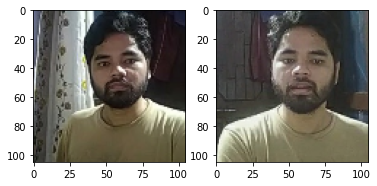

In [38]:
# Set plot size 
plt.figure(figsize=(6,6))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# 7. Save Model

In [39]:
# Save weights
model.save('final2000siamesemodel.h5')

In [40]:
#tf.keras.models.save_model(model, 'final2000siamesemodel2.h5')

In [13]:
# Reload model 
 
ld_model = tf.keras.models.load_model('final2000siamesemodel.h5', 
                                   custom_objects = {"CustomModel": CustomModel, "DistanceLayer": DistanceLayer})

In [43]:
# Make predictions with reloaded model
ld_model.predict([test_input, test_val])

array([[9.9977118e-01],
       [9.9999881e-01],
       [6.8556942e-04],
       [9.9912018e-01],
       [1.3117748e-05],
       [9.9999988e-01],
       [9.2520285e-01],
       [6.3960615e-04],
       [9.9795461e-01],
       [1.9843925e-05],
       [9.7950280e-01],
       [9.9705303e-01],
       [9.0782933e-06],
       [9.9990845e-01],
       [9.9999976e-01],
       [2.5419622e-05]], dtype=float32)

In [29]:
# View model summary
ld_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (CustomModel)        (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# 8. Real Time Test

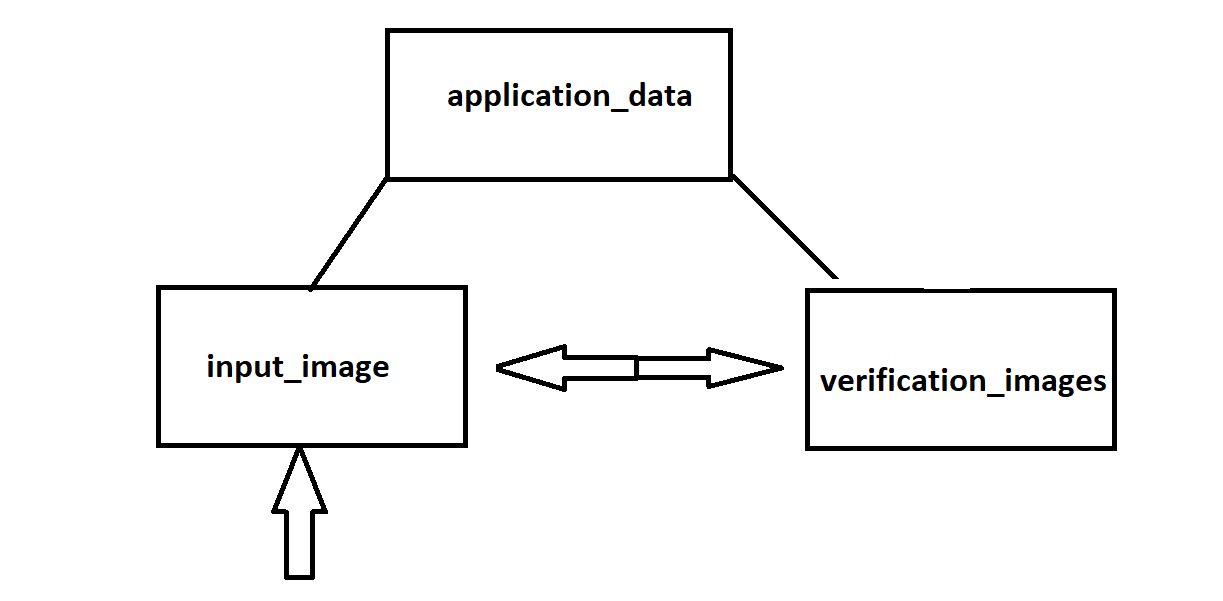

### 8.1 Verification Function

In [30]:
def verify_image(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = access_imgfiles_and_preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = access_imgfiles_and_preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [35]:
results, verified = verify_image(ld_model, 0.5, 0.5)
verified

1/1 [==============================] - 1s 700ms/step


True

## 8.2 OpenCV Real Time Verification

In [32]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify_image(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 693ms/step
False


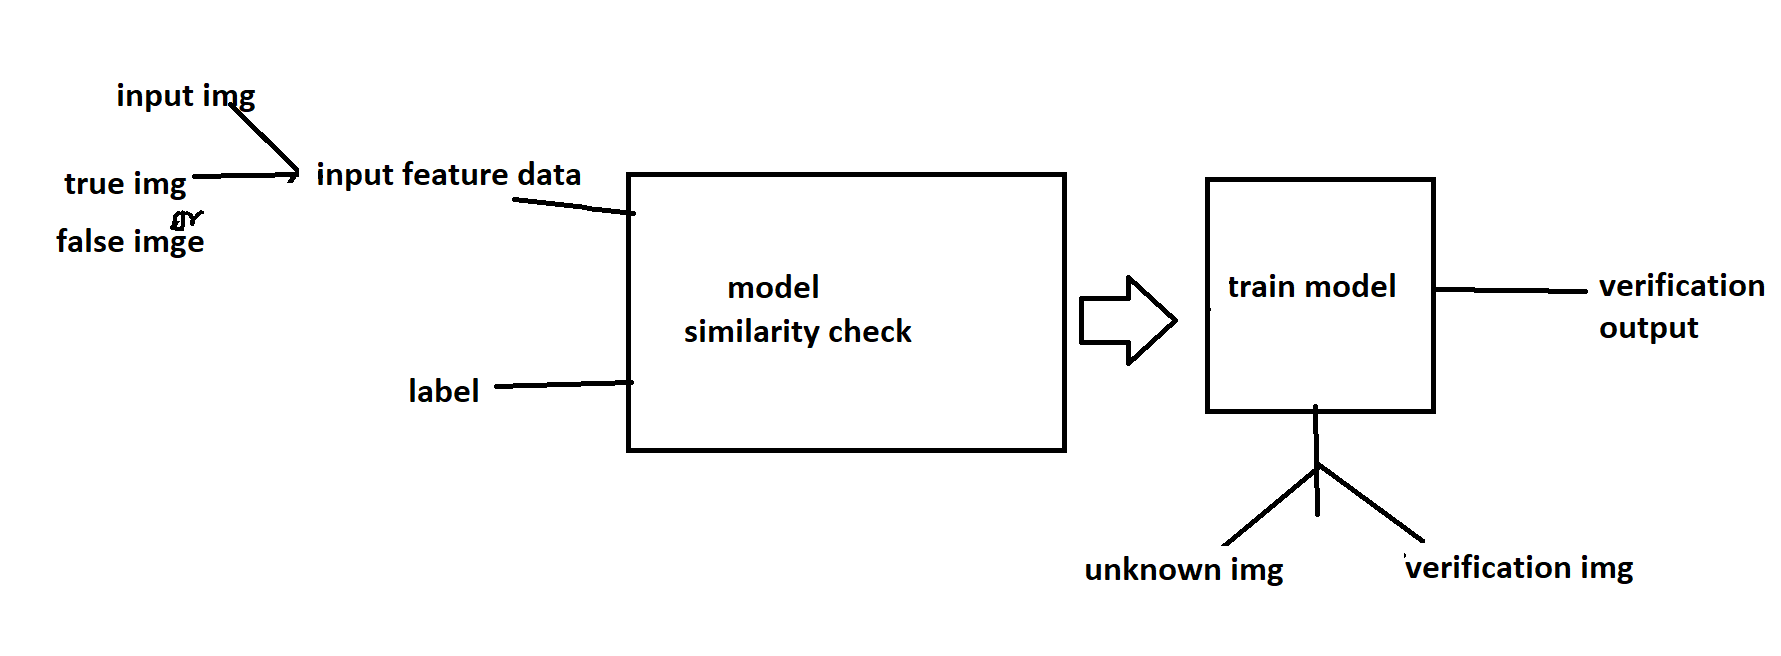